# W207 Project - Forest Cover, Kaggle

Abstract: Our team, comprised of **Sudipto Dasgupta, Jeff Li, and Karthik Srinivasan** has been tasked the Forest Cover Type Prediction problem on Kaggle (https://www.kaggle.com/c/forest-cover-type-prediction). In this competition we are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

We apply a combination of machine learning models and data preprocessing techniques to the data in order to try and predict the cover type. 

Forests and the biodiversity they contain are declining at an alarming rate throughout the world. Prediction of cover type can significantly help assessing rate of deforestation and taking a corrective action to nurture the flora and fauna. 

## Part 1: Data Processing, Exploratory Data Analysis

#### Dataset description

Labels

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:  
1 - Spruce/Fir  
2 - Lodgepole Pine  
3 - Ponderosa Pine  
4 - Cottonwood/Willow  
5 - Aspen  
6 - Douglas-fir  
7 - Krummholz  

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).
 
Data Fields  
Elevation - Elevation in meters  
Aspect - Aspect in degrees azimuth  
Slope - Slope in degrees  
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features  
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features  
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway  
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice  
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice  
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice  
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points  
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation  
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation  
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation  

The wilderness areas are:  

1 - Rawah Wilderness Area  
2 - Neota Wilderness Area  
3 - Comanche Peak Wilderness Area  
4 - Cache la Poudre Wilderness Area  

The soil types are:  

1 Cathedral family - Rock outcrop complex, extremely stony.  
2 Vanet - Ratake families complex, very stony.  
3 Haploborolis - Rock outcrop complex, rubbly.  
4 Ratake family - Rock outcrop complex, rubbly.  
5 Vanet family - Rock outcrop complex complex, rubbly.  
6 Vanet - Wetmore families - Rock outcrop complex, stony.  
7 Gothic family.  
8 Supervisor - Limber families complex.  
9 Troutville family, very stony.  
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.  
11 Bullwark - Catamount families - Rock land complex, rubbly.  
12 Legault family - Rock land complex, stony.  
13 Catamount family - Rock land - Bullwark family complex, rubbly.  
14 Pachic Argiborolis - Aquolis complex.  
15 unspecified in the USFS Soil and ELU Survey.  
16 Cryaquolis - Cryoborolis complex.  
17 Gateview family - Cryaquolis complex.  
18 Rogert family, very stony.  
19 Typic Cryaquolis - Borohemists complex.  
20 Typic Cryaquepts - Typic Cryaquolls complex.  
21 Typic Cryaquolls - Leighcan family, till substratum complex.  
22 Leighcan family, till substratum, extremely bouldery.  
23 Leighcan family, till substratum - Typic Cryaquolls complex.  
24 Leighcan family, extremely stony.  
25 Leighcan family, warm, extremely stony.  
26 Granile - Catamount families complex, very stony.  
27 Leighcan family, warm - Rock outcrop complex, extremely stony.  
28 Leighcan family - Rock outcrop complex, extremely stony.  
29 Como - Legault families complex, extremely stony.  
30 Como family - Rock land - Legault family complex, extremely stony.  
31 Leighcan - Catamount families complex, extremely stony.  
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.  
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.  
34 Cryorthents - Rock land complex, extremely stony.  
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.  
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.  
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.  
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.  
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.  
40 Moran family - Cryorthents - Rock land complex, extremely stony.  


#### Import Dependencies

In [76]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier

#Additional imports
import graphviz
from sklearn import tree
import xgboost as xgb

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle

In [77]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [78]:
pd.set_option('display.max_columns',100)
warnings.filterwarnings(action='ignore')

#### Read all Data

Kaggle Competition provides 2 data files. 
- train.csv : This is train data and already has Cover_Type column populated
- test.csv : For each row in this file Cover_Type needs to be predicted as a column and the updated file needs to be submitted to Kaggle


In [79]:
data = pd.read_csv("train.csv")
data_predict = pd.read_csv("test.csv" , header = None)
print ( data_predict.shape , data.shape)

(565893, 55) (15120, 56)


There are 565893 records in test file and 15120 records in train file

#### Data Preparation and Split

We Split the train data into train , develop , predict . The split is done using random sampling. We split it as below :
train_data : 12000 records  
dev_data : 1000 records  
test_data : 2120 records  
All EDA will be done on the train data.

In [80]:
X = np.array(data.as_matrix(columns=data.columns[1:55]))
Y = np.array(data["Cover_Type"].tolist())
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
train_df = data.iloc[shuffle,:].iloc[:12000 , :]
print('data shape: ', X.shape)
print('label shape:', Y.shape)
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]

data shape:  (15120, 54)
label shape: (15120,)


### Exploratory Data Analysis

#### Step 1 : Describe the train data

In [81]:
display(train_df.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000
mean,7588.194250,2749.842583,156.640417,16.572667,227.467500,51.202167,1719.143500,212.760583,218.850583,134.838833,1511.790667,0.23650,0.033000,0.42050,0.310000,0.023750,0.040333,0.063583,0.056583,0.011083,0.042417,0.0,0.000083,0.000583,0.142000,0.02700,0.014583,0.030917,0.011667,0.0,0.007917,0.040750,0.004167,0.003000,0.009417,0.001000,0.022500,0.049583,0.016583,0.000083,0.003750,0.001083,0.000583,0.086917,0.046417,0.020750,0.046917,0.039917,0.001417,0.006500,0.000667,0.00250,0.048750,0.043833,0.030417,4.001250
std,4375.415331,418.369030,110.021312,8.448254,209.810584,60.927398,1334.508428,30.545425,22.896065,45.829665,1101.524353,0.42495,0.178644,0.49366,0.462513,0.152276,0.196748,0.244019,0.231054,0.104697,0.201546,0.0,0.009129,0.024146,0.349065,0.16209,0.119883,0.173099,0.107385,0.0,0.088626,0.197719,0.064418,0.054692,0.096586,0.031608,0.148309,0.217092,0.127709,0.009129,0.061125,0.032898,0.024146,0.281725,0.210395,0.142552,0.211469,0.195772,0.037614,0.080363,0.025812,0.04994,0.215354,0.204733,0.171738,2.003018
min,1.000000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,3832.750000,2374.000000,65.000000,10.000000,67.000000,5.000000,760.000000,196.000000,207.000000,106.000000,726.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000
50%,7587.000000,2753.000000,126.000000,15.000000,180.000000,33.000000,1315.000000,220.000000,222.000000,138.000000,1252.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0

Observations: 

1. All fields are continous or binary. There are no text fields 
2. Soil_Type fields are binary
3. Wilderness Area fields are binary
4. Following are the fields which are continous : Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points

#### Step 2: Count zero and NA values

In [82]:
def count_zero_for_a_column(train_df, column_name):
    count_obj = train_df.apply(lambda x: True if x[column_name] == 0 else False , axis=1)
    no_rows = len(count_obj[count_obj == True].index)
    print ( column_name , ' : ' , no_rows )
print ("\033[1m" , 'Count of zero rows by column :' , "\033[0;0m")
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
for column_name in column_list:
    count_zero_for_a_column(train_df, column_name)

 Count of zero rows by column : 
Elevation  :  0
Aspect  :  83
Slope  :  4
Horizontal_Distance_To_Hydrology  :  1270
Vertical_Distance_To_Hydrology  :  1503
Horizontal_Distance_To_Roadways  :  3
Hillshade_9am  :  1
Hillshade_Noon  :  0
Hillshade_3pm  :  71
Horizontal_Distance_To_Fire_Points  :  2


Observations: Horizontal Distance to Hydrology and Vertical Distance to Hydrology columns have a significant number of records ( > 10%) which are zero. This ca be possible for any vegetation which is very close to ground water

In [83]:
print ("\033[1m" , 'Count of NA rows by column :' , "\033[0;0m")
for i , row in enumerate(train_df.count(axis = 0)): 
    if train_df.shape[0] != row:
        print (train_df.columns[i])

 Count of NA rows by column : 


Obeservation : There are no NA values in the data

#### Step 3 : Scatter plot for continous fields

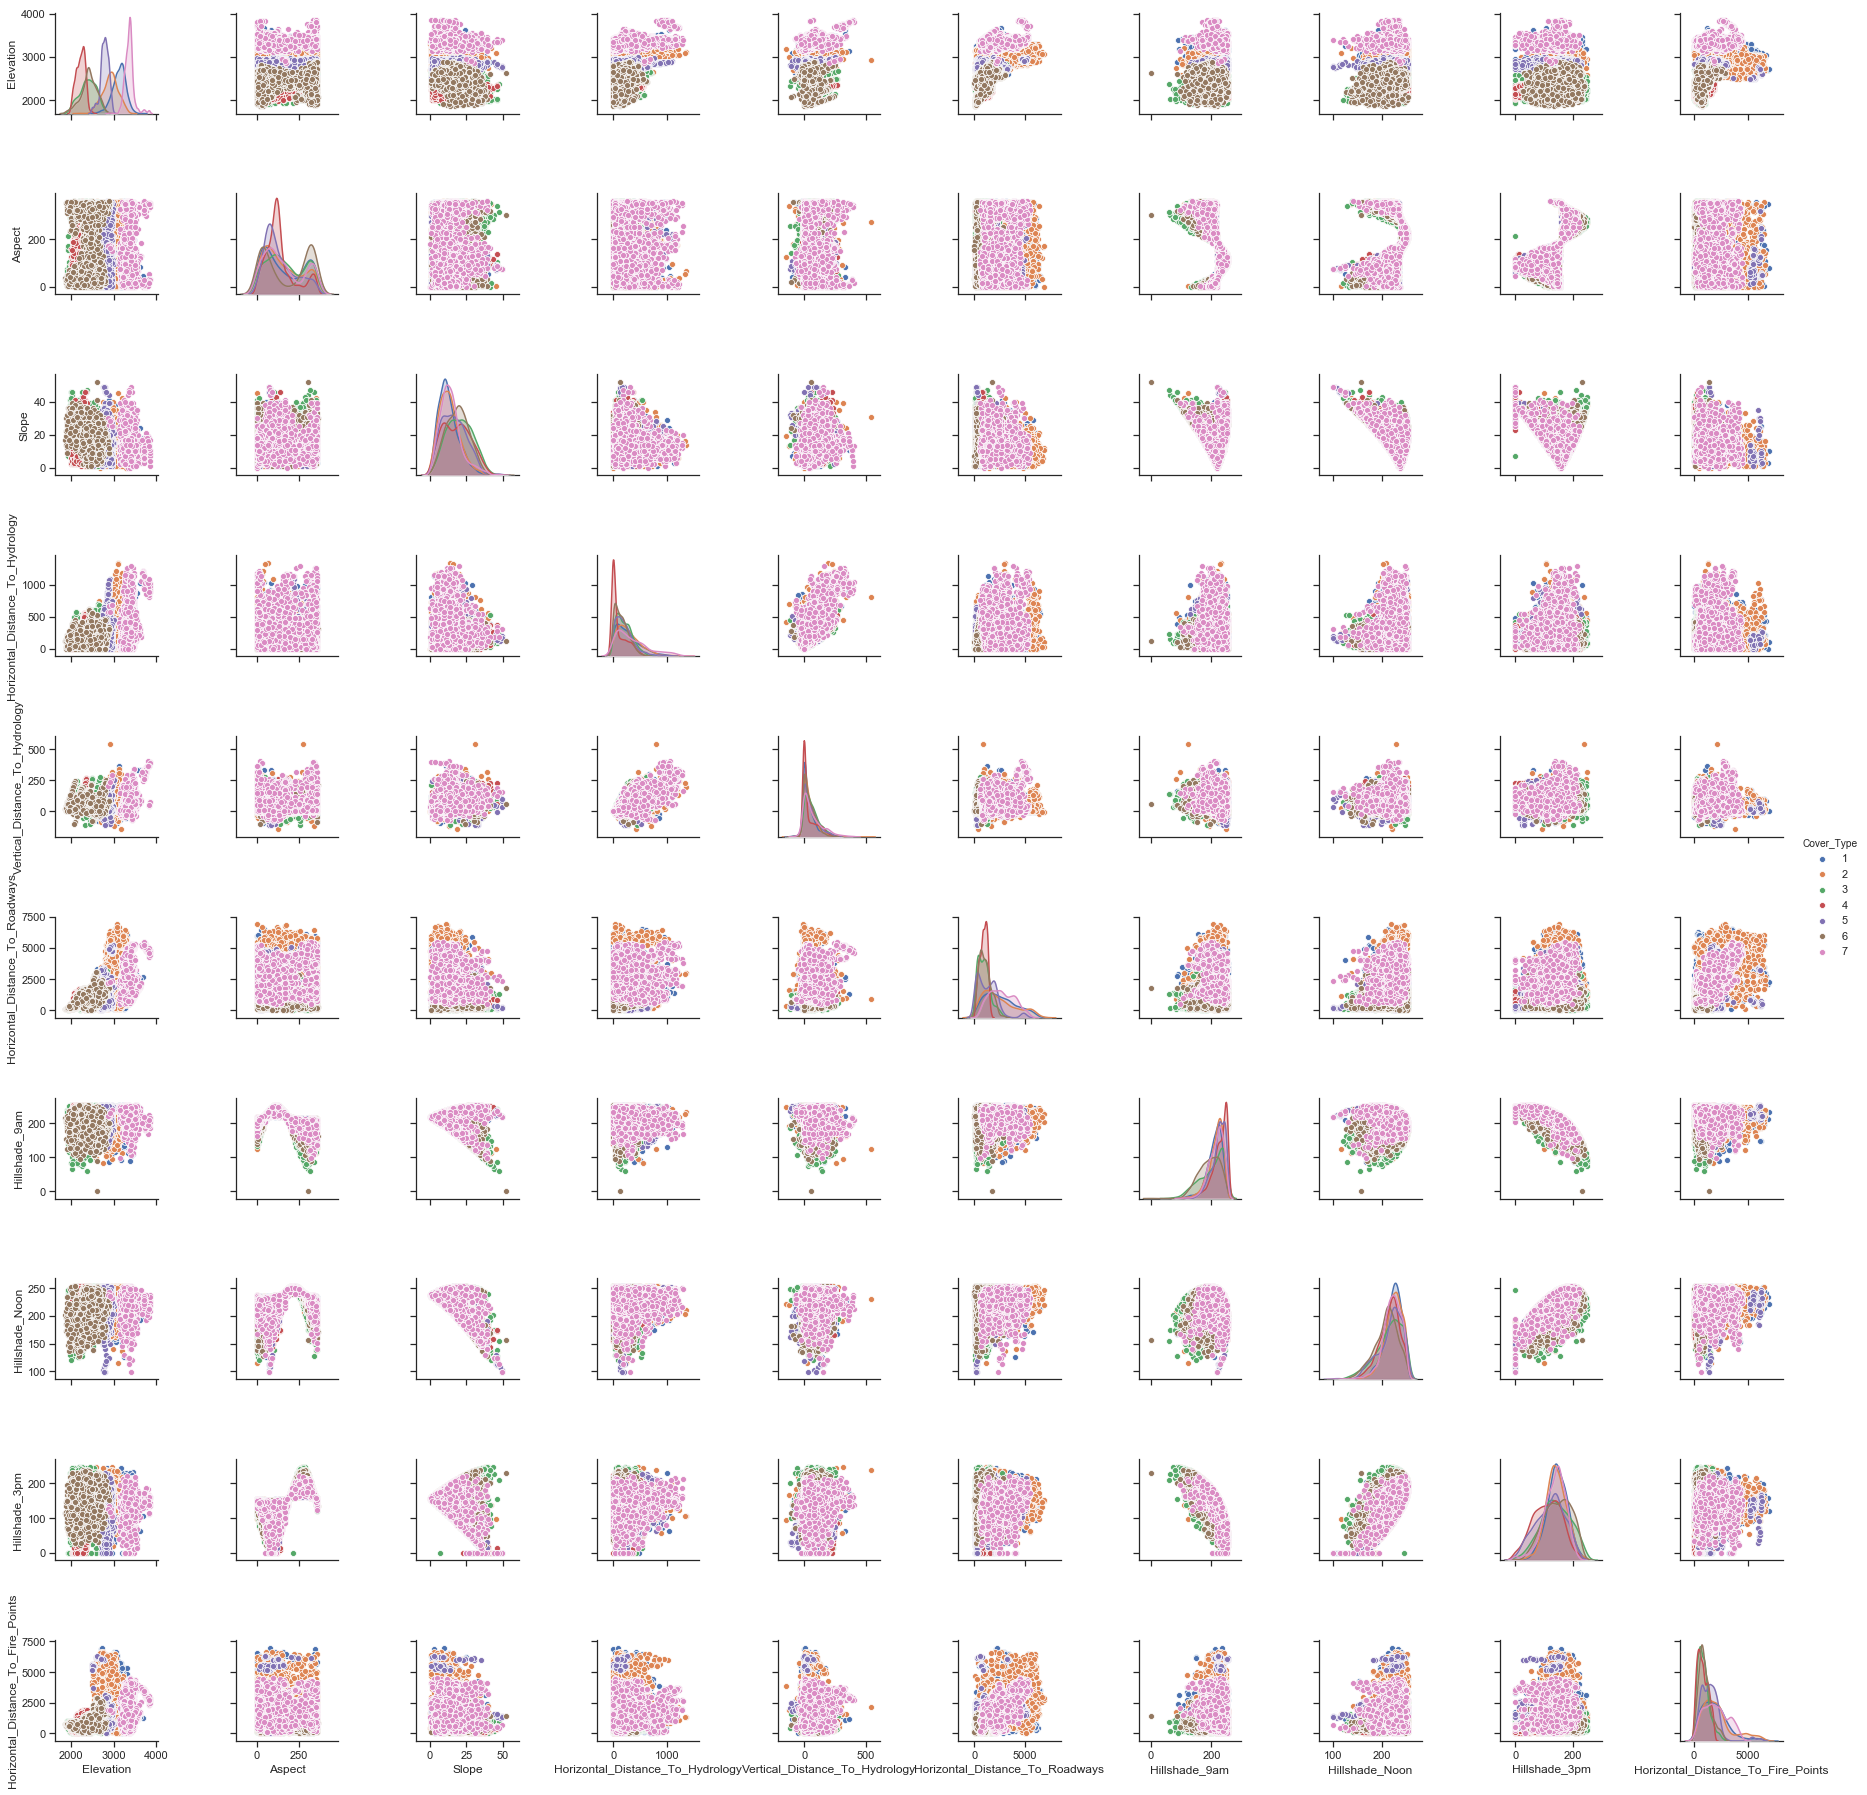

In [92]:
sns.set(style="ticks")
plot_df = train_df[['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points' , 'Cover_Type' ]]
chart = sns.pairplot( plot_df , vars = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points'] , hue = 'Cover_Type')

Observations:
    
1. The graph shows that there is a correlation between Hillshade_3PM , Hillshade_9AM , Hillshade_Noon , although it is not linear
2. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Aspect , although it is not linear.
3. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Slope , although it is not linear.
4. The distribution of elevation is different for different values of cover_type . Hence we expect the elevation as a significant parameter for models

#### Step 4 : Box Plots by Cover Type for the Continous Variables

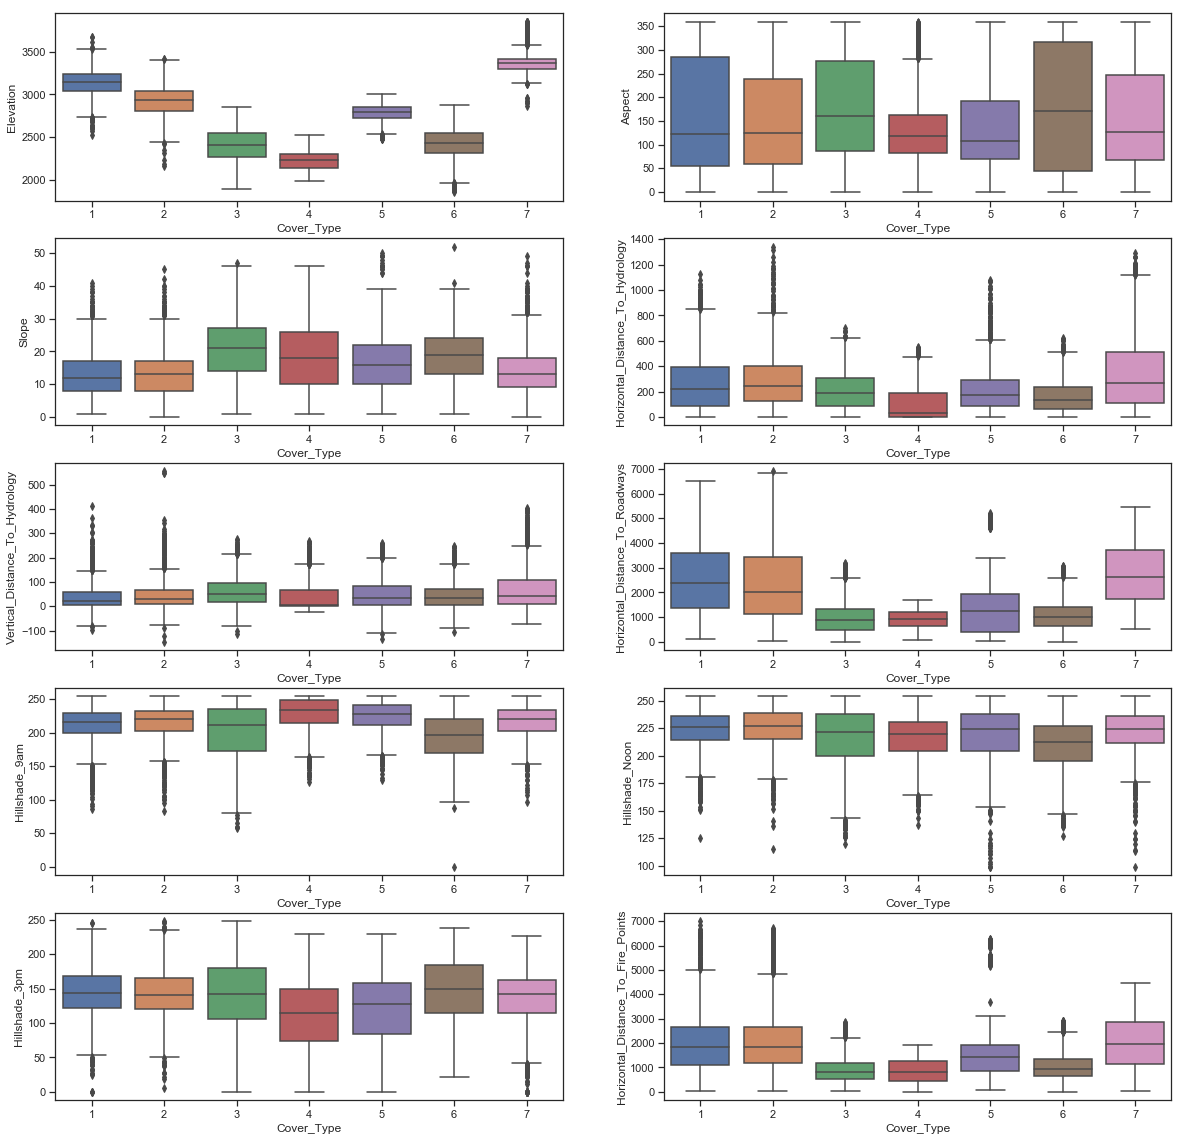

In [93]:
fig, axes = plt.subplots(5, 2)
fig.set_size_inches(20, 20)
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points' ]
i = 0
for column_name in column_list:
    row_index = i // 2
    column_index = i % 2
    sns.boxplot(x="Cover_Type", y=column_name, data=data , ax=axes[row_index][column_index])
    i = i + 1  

Observations :
1. Mean Elevation is highest for Cover Type 7
2. Mean Slope is lower for Cover Type 1,2 and 7
3. Mean Horizontal Distance to Roadways and Horizontal Distance to Fire Points are higher for Cover Type 1,2,7
4. Elevation varies based on Cover Types . Hence we expect the elevation as a significant parameter for models

#### Step 5 : Bar Graphs by Cover Type for Soil Type and Wilderness Area Variables

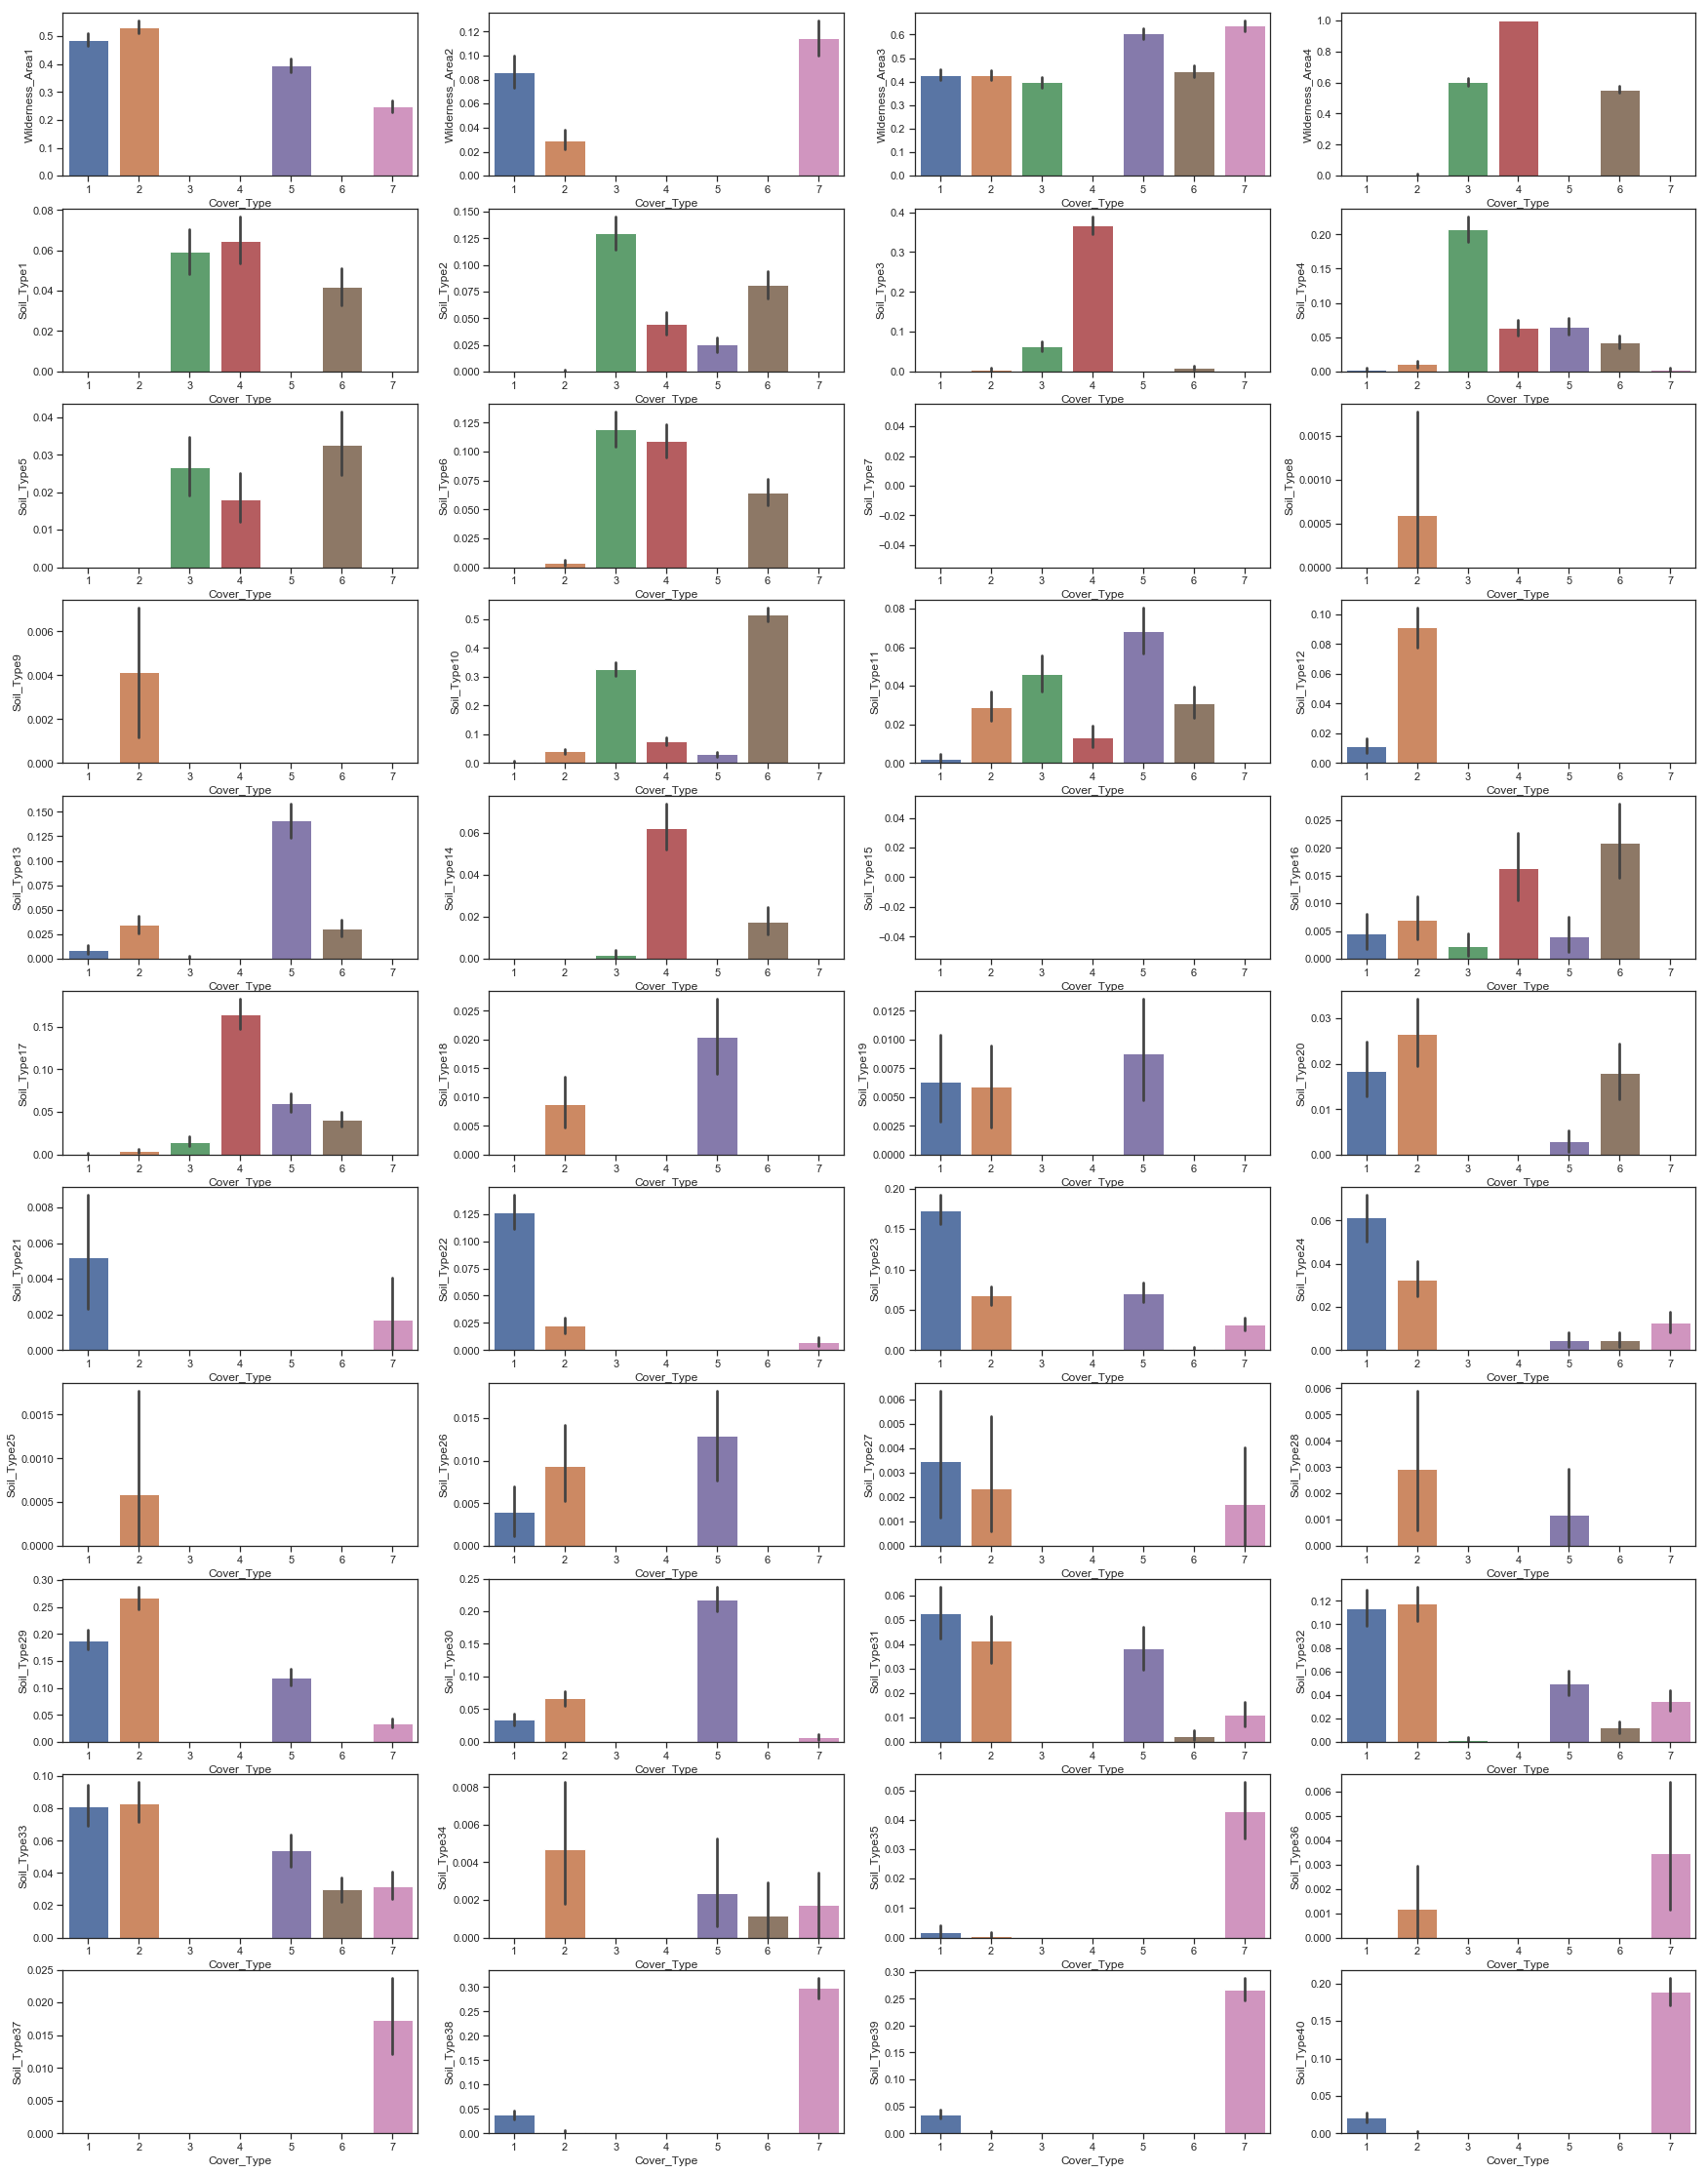

In [94]:
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points' ]
fig, axes = plt.subplots(11, 4)
fig.set_size_inches(30, 40)
i = 0
for column in train_df.columns:
    if column not in column_list and column != 'Cover_Type' and column != 'Id':
        row_index = i // 4
        column_index = i % 4
        sns.barplot(x="Cover_Type", y=column, data=train_df , ax=axes[row_index][column_index])
        i = i + 1

Observations:
1. Soil_Type_8 and Soil_Type_25 only exists for Cover_Type 2
2. Soil_Type_37 only exists for Cover_Type 7
3. Soil_Type_40 ,  Soil_Type_39 ,  Soil_Type_38 ,  Soil_Type_36 ,  Soil_Type_35 mainly exists for Cover_Type 7
4. Wilderness_Area_2 only exists for Cover_Type 1 , 2 , 7
5. Wilderness_Area_2 mainly exists for Cover_Type 3 , 4 , 6
6. Soil_Type_7 and Soil_Type_15 is 0 for all Cover_Types. Hence we do not expect these parameters as a significant parameter for models

## Part 2: Preprocessing & Modelling approaches

### Modelling Approaches Overview

### Reusable Algorithm Code

In [95]:
class MLModel():
    """
    Parent class for all ML models
    """
    def __init__(self, modelName='LogisticRegression'):
        self.modelName = modelName
        self.scaler = None
        self.pca = None
        self.npca = None
        self.scaler_type = None
        self.X_train = None
        self.X_dev = None
        self.predicted = None
        
        if modelName == 'LogisticRegression':
            self.model = LogisticRegression(penalty='l2', solver='newton-cg', tol=0.001,random_state=1,
                                            multi_class='auto', max_iter=1000, verbose=0)
        elif modelName == 'DecisionTree':
            self.model = DecisionTreeClassifier(random_state=1)
        elif modelName == 'RandomForest':
            self.model = RandomForestClassifier(random_state=1)
        elif modelName == 'GradientBoosting':
            self.model = GradientBoostingClassifier(random_state=1)
        elif modelName == 'KNearestNeighbor':
            self.model = KNeighborsClassifier()
        elif modelName == 'Xgboost':
            self.model = xgb.XGBClassifier(random_state=1)
        elif modelName == 'LinearSVM':
            self.model = LinearSVC(random_state=1, multi_class='crammer_singer')
        elif modelName == 'SVC':
            self.model = SVC(random_state=1)
        elif modelName == 'NeuralNet':
            self.model = MLPClassifier(random_state=1)
        else:
            raise Exception('Model ' + modelName + ' not implemented...')
            
    def grid_search(self, train_data, train_labels, dev_data, dev_labels, params, 
                    pca_var_threshold=None, scaler_type=None, print_out=False):
        grd_model = GridSearchCV( self.model,  param_grid = params ,return_train_score = 1, cv=3, n_jobs=-1)
        self.X_train = train_data
        self.X_dev = dev_data

        if scaler_type is not None:
            [self.X_train, self.X_dev] = self.scale_data(scaler_type ,  train_data , dev_data)
            if pca_var_threshold is not None:
                [self.X_train, self.X_dev] = self.pca_transform(self.X_train, self.X_dev, pca_var_threshold)
        else:
            if pca_var_threshold is not None:
                [self.X_train, self.X_dev] = self.pca_transform(self.X_train, self.X_dev, pca_var_threshold)

        grd_model.fit(self.X_train,train_labels)
        predicted= grd_model.predict(self.X_dev)
        
        if (print_out):  
            print ( "\033[1m" ,  self.modelName , "\033[0;0m" )
            print ("Best fit parameters :")
            print (grd_model.best_params_)
            print ("Best fit model F1 score :")
            print (metrics.f1_score(dev_labels, predicted , average='micro'))

        self.classification_report = classification_report(predicted,dev_labels )
        self.best_model = grd_model
        self.best_metrics = metrics.f1_score(dev_labels, predicted , average='micro')
        self.predicted = predicted
        self.cm = metrics.confusion_matrix(dev_labels,predicted)
        
    def scale_data(self, scaler_type ,  X_train , X_dev):
        self.scaler_type = scaler_type
        
        if scaler_type == 'MinMax' :
            scaler = MinMaxScaler(feature_range=(0, 1))
        elif scaler_type == 'Robust':
            scaler = RobustScaler()
        elif scaler_type == 'Standard':
            scaler = StandardScaler()
        else:
            print('Unrecognized scaler ' + scaler_type + ' ... reverting to MinMax')
            scaler = MinMaxScaler(feature_range=(0, 1))
            self.scaler_type = 'MinMax'
            
        scaled_X_train = scaler.fit_transform(X_train)
        scaled_X_dev = scaler.transform(X_dev)
        
        self.scaled_X_train = scaled_X_train
        self.scaled_X_dev = scaled_X_dev
        self.scaler = scaler

        return([scaled_X_train, scaled_X_dev])
    
    def pca_transform(self, X_train , X_dev, var_threshold=0.95):
        pca = PCA(n_components=X_train.shape[1])
        pca.fit(X_train)
        df_pca = pd.DataFrame()
        df_pca['NumPrinComponents'] = np.arange(start=1 , stop=X_train.shape[1])
        df_pca['ExplainedVariance'] = pd.Series(pca.explained_variance_ratio_)
        df_pca['CumExplainedVariance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
        print(df_pca.head())
        npca = df_pca.loc[df_pca.CumExplainedVariance > var_threshold,:].NumPrinComponents.iloc[0]
        self.npca = npca
        pcaModel = PCA(n_components=npca)
        X_train_pca = pcaModel.fit_transform(X_train)
        X_dev_pca = pcaModel.transform(X_dev)
        return([X_train_pca, X_dev_pca])
    
    def drawConfusionMatrix(self):
        plt.figure(figsize=(10,10))
        plt.imshow(self.cm, interpolation='nearest', cmap=plt.cm.Wistia)
        classNames = [str(i+1) for i in range(self.cm.shape[0])]
        plt.title('Confusion Matrix For ' + self.modelName, fontsize = 18)
        plt.ylabel('True label', fontsize = 14)
        plt.xlabel('Predicted label', fontsize = 14)
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=0, fontsize=14)
        plt.yticks(tick_marks, classNames, fontsize=14)
        for i in range(len(classNames)):
            for j in range(len(classNames)):
                plt.text(j,i, str(self.cm[i][j]), size='large')
        plt.show()


In [96]:
scaler_experiments = [None, 'MinMax', 'Robust']
pca_experiments = [None, 0.95]
model_experiments = [
    {'modelName':'KNearestNeighbor','params':{ 'n_neighbors' : [3, 5, 7, 9] }},
    {'modelName':'LogisticRegression','params':{ 'C' : [ 0.1, 1.0, 100.0]}},
    {'modelName':'SVC','params':{ 'C' : [10.0]}},
    {'modelName':'LinearSVM','params':{ 'C' : [10.0]}},
    {'modelName':'DecisionTree','params':{ 'max_depth' : [5, 15, 30, 50] }},
    {'modelName':'RandomForest','params':{ 'n_estimators' : [ 20 , 40 ,100 , 200 ]  }},
    {'modelName':'GradientBoosting','params':{ 'n_estimators' : [ 20 , 40 ,100 ,200]}},
    {'modelName':'Xgboost','params': {'objective':['multi:softmax'],'max_depth': [3,5,7],'subsample': [0.8],
          'n_estimators': [20, 40, 100, 200]}},
    {'modelName':'NeuralNet','params':{ 'hidden_layer_sizes' : [(50,),(50,20),(100,),(100, 20)]}}    
]

In [98]:
model_list = []
ctr=1
results_df = pd.DataFrame()
for scaler_type in scaler_experiments:
    for pca_var in pca_experiments:
        for model_type in model_experiments:
            print('-------------------------------------')
            print('Model #' + str(ctr))
            print('Scaler: ' + str(scaler_type))
            print('PCA Variance Threshold: ' + str(pca_var))  
            print('Model: ' + model_type['modelName'])
            print('Parameters: ' + str(json.dumps(model_type['params'])))
            
            model = MLModel(modelName=model_type['modelName'])
            model.grid_search(train_data, train_labels, dev_data, dev_labels, model_type['params'], 
                       pca_var_threshold=pca_var, scaler_type=scaler_type, print_out=False)
            
            print('PCA Components: ' + str(model.npca))
            print('Best Parameters: ' + str(json.dumps(model.best_model.best_params_)))
            print('Best F1 Score: ' + str(model.best_metrics))
            print('-------------------------------------')
            model_list.append(model)
            
            results_df = results_df.append(pd.DataFrame({'Model#':[ctr],'ModelName':[model.modelName],'Scaler':[str(scaler_type)],
                                            'PCA: VarianceThreshold':[str(pca_var)], 
                                            'PCA: Number of Components':[str(model.npca)],
                                            'Best Parameters':[str(json.dumps(model.best_model.best_params_))],
                                            'F1 Score':[str(model.best_metrics)]}))

            # Save to file in the current working directory
            #pkl_filename = 'Models/' + model.modelName + '-' + str(scaler_type) + '-' + str(pca_var) + '.pkl'
            #with open(pkl_filename, 'wb') as file:
            #    pickle.dump(model, file)
            ctr +=1

-------------------------------------
Model #1
Scaler: None
PCA Variance Threshold: None
Model: KNearestNeighbor
Parameters: {"n_neighbors": [3, 5, 7, 9]}
PCA Components: None
Best Parameters: {"n_neighbors": 3}
Best F1 Score: 0.808
-------------------------------------
-------------------------------------
Model #2
Scaler: None
PCA Variance Threshold: None
Model: LogisticRegression
Parameters: {"C": [0.1, 1.0, 100.0]}
PCA Components: None
Best Parameters: {"C": 100.0}
Best F1 Score: 0.68
-------------------------------------
-------------------------------------
Model #3
Scaler: None
PCA Variance Threshold: None
Model: SVC
Parameters: {"C": [10.0]}
PCA Components: None
Best Parameters: {"C": 10.0}
Best F1 Score: 0.138
-------------------------------------
-------------------------------------
Model #4
Scaler: None
PCA Variance Threshold: None
Model: LinearSVM
Parameters: {"C": [10.0]}
PCA Components: None
Best Parameters: {"C": 10.0}
Best F1 Score: 0.487
------------------------------

PCA Components: 3
Best Parameters: {"hidden_layer_sizes": [100, 20]}
Best F1 Score: 0.579
-------------------------------------
-------------------------------------
Model #19
Scaler: MinMax
PCA Variance Threshold: None
Model: KNearestNeighbor
Parameters: {"n_neighbors": [3, 5, 7, 9]}
PCA Components: None
Best Parameters: {"n_neighbors": 3}
Best F1 Score: 0.796
-------------------------------------
-------------------------------------
Model #20
Scaler: MinMax
PCA Variance Threshold: None
Model: LogisticRegression
Parameters: {"C": [0.1, 1.0, 100.0]}
PCA Components: None
Best Parameters: {"C": 100.0}
Best F1 Score: 0.687
-------------------------------------
-------------------------------------
Model #21
Scaler: MinMax
PCA Variance Threshold: None
Model: SVC
Parameters: {"C": [10.0]}
PCA Components: None
Best Parameters: {"C": 10.0}
Best F1 Score: 0.662
-------------------------------------
-------------------------------------
Model #22
Scaler: MinMax
PCA Variance Threshold: None
Mod

PCA Components: 28
Best Parameters: {"hidden_layer_sizes": [100, 20]}
Best F1 Score: 0.786
-------------------------------------
-------------------------------------
Model #37
Scaler: Robust
PCA Variance Threshold: None
Model: KNearestNeighbor
Parameters: {"n_neighbors": [3, 5, 7, 9]}
PCA Components: None
Best Parameters: {"n_neighbors": 3}
Best F1 Score: 0.795
-------------------------------------
-------------------------------------
Model #38
Scaler: Robust
PCA Variance Threshold: None
Model: LogisticRegression
Parameters: {"C": [0.1, 1.0, 100.0]}
PCA Components: None
Best Parameters: {"C": 100.0}
Best F1 Score: 0.686
-------------------------------------
-------------------------------------
Model #39
Scaler: Robust
PCA Variance Threshold: None
Model: SVC
Parameters: {"C": [10.0]}
PCA Components: None
Best Parameters: {"C": 10.0}
Best F1 Score: 0.733
-------------------------------------
-------------------------------------
Model #40
Scaler: Robust
PCA Variance Threshold: None
Mo

PCA Components: 20
Best Parameters: {"hidden_layer_sizes": [100, 20]}
Best F1 Score: 0.803
-------------------------------------


## Part 3: Results & Evaluation

In [100]:
display(results_df.sort_values(by='F1 Score', ascending=False))

,Model#,ModelName,Scaler,PCA: VarianceThreshold,PCA: Number of Components,Best Parameters,F1 Score
0,44,Xgboost,Robust,None,None,"{""max_depth"": 7, ""n_estimators"": 200, ""objecti...",0.858
0,26,Xgboost,MinMax,None,None,"{""max_depth"": 7, ""n_estimators"": 200, ""objecti...",0.856
0,8,Xgboost,None,None,None,"{""max_depth"": 7, ""n_estimators"": 200, ""objecti...",0.855
0,6,RandomForest,None,None,None,"{""n_estimators"": 200}",0.85
0,24,RandomForest,MinMax,None,None,"{""n_estimators"": 200}",0.848
0,42,RandomForest,Robust,None,None,"{""n_estimators"": 200}",0.848
0,33,RandomForest,MinMax,0.95,28,"{""n_estimators"": 200}",0.8289999999999998
0,45,NeuralNet,Robust,None,None,"{""hidden_layer_sizes"": [100, 20]}",0.825
0,53,Xgboost,Robust,0.95,20,"{""max_depth"": 7, ""n_estimators"": 200, ""objecti...",0.824
0,51,RandomForest,Robust,0.95,20,"{""n_estimators"": 200}",0.8140000000000001


## Part 4: Additional approaches, room for improvement

#### Ensemble Approach 1 

We have observed from the confusion matrix that the models are most confused between Cover Type 1 and 2. In Ensemble Approach 1 we do the following :

1. We train a Random Forest model (Model 1) to predict whether the Cover Type is 1, 2 ( we call this class 0 ) or 3 , 4  , 5 , 6 ,7 ( we call this class 1 )
2. We train a second Random Forest model (Model 2) only for Cover Type 1, 2 to predict Cover Type 
3. We train a third Random Forest model (Model 3) only for Cover Types 3,4,5,6,7 to predict Cover Type
4. For prediction we first predict the class based on Model 1. In case it predicts 0 then we use Model 2 to predict the Cover Type. In case it predicts 1 then we use Model 3 to predict the Cover Type 

In [87]:
#Prepare train and dev data for model 1 
test_model_1 = MLModel(modelName='RandomForest')
test_model_2 = MLModel(modelName='RandomForest')
test_model_3 = MLModel(modelName='RandomForest')
pca_components = None
scaler_type = None
params = {  'n_estimators' : [ 20, 30 , 40 ,50 , 200 ]  }
train_labels_ens_1 = np.where(train_labels> 2 , 1 , 0)
dev_labels_ens_1 = np.where(dev_labels> 2 , 1 , 0)
test_model_1.grid_search(train_data, train_labels_ens_1, dev_data, dev_labels_ens_1, params, pca_var_threshold=pca_components, scaler_type=scaler_type , print_out=False)
train_labels_ens_2 = train_labels[np.where(train_labels <= 2)]
train_data_ens_2 = train_data[np.where(train_labels <= 2)]
test_model_2.grid_search(train_data_ens_2, train_labels_ens_2, dev_data, dev_labels, params, pca_var_threshold=pca_components, scaler_type=scaler_type , print_out=False)
train_labels_ens_3 = train_labels[np.where(train_labels > 2)]
train_data_ens_3 = train_data[np.where(train_labels > 2)]
test_model_3.grid_search(train_data_ens_3, train_labels_ens_3, dev_data, dev_labels, params, pca_var_threshold=pca_components, scaler_type=scaler_type, print_out=False)

In [88]:
def predict_approach_ensemble_7(data , labels , test_model_1 , test_model_2, test_model_3):
    predicted_1 = test_model_1.best_model.predict(data)
    predicted_2 = test_model_2.best_model.predict(data)
    predicted_3 = test_model_3.best_model.predict(data)
    predicted_final = np.empty(labels.size , dtype=int)
    for i in range(labels.size):
        if predicted_1[i] == 0:
            predicted_final[i] = predicted_2[i]
        else:
            predicted_final[i] = predicted_3[i]
    return predicted_final 
predicted = predict_approach_ensemble_7(dev_data , dev_labels , test_model_1 , test_model_2, test_model_3)
print ("Best fit model F1 score :")
print(metrics.f1_score(dev_labels, predicted , average='micro'))

Best fit model F1 score :
0.845


#### Ensemble Approach 2

We have observed from the confusion matrix that the models are most confused between Cover Type 1 and 2. In Ensemble Approach 2 we do the following :

1. We train a Random Forest model ( Model 1 to predict class type 0 , 3 , 4 , 5, 6, 7 . 0 represents cover type 1 ,2 while 3,4,5,6,7 reperesents the respective cover type
2. We train a second Random Forest model (Model 2) only for Cover Type 1, 2 to predict Cover Type 
3. For prediction we first predict the class based on Model 1. In case it predicts 0 then we use Model 2 to predict the Cover Type. In case it predict anything other than 0 , the class type is considered as the predicted cover type

In [89]:
train_labels_ens_1 = np.where(train_labels> 2 , train_labels , 0 )
dev_labels_ens_1 = np.where(dev_labels> 2 , dev_labels , 0)

In [90]:
test_model_1 = MLModel(modelName='RandomForest')
test_model_2 = MLModel(modelName='RandomForest')
pca_components = None
scaler_type = None
params = {  'n_estimators' : [ 20, 30 , 40 ,50 , 200 ]  }
train_labels_ens_1 = np.where(train_labels> 2 , train_labels , 0 )
dev_labels_ens_1 = np.where(dev_labels> 2 , dev_labels , 0)
test_model_1.grid_search(train_data, train_labels_ens_1, dev_data, dev_labels_ens_1, params, pca_var_threshold=pca_components, scaler_type=scaler_type , print_out=False)
train_labels_ens_2 = train_labels[np.where(train_labels <= 2)]
train_data_ens_2 = train_data[np.where(train_labels <= 2)]
test_model_2.grid_search(train_data_ens_2, train_labels_ens_2, dev_data, dev_labels, params, pca_var_threshold=pca_components, scaler_type=scaler_type , print_out=False)

In [91]:
def predict_approach_ensemble_8(data , labels , test_model_1 , test_model_2):
    predicted_1 = test_model_1.best_model.predict(data)
    predicted_2 = test_model_2.best_model.predict(data)
    predicted_final = predicted_1
    for i in range(predicted_1.size):
        if predicted_1[i] == 0:
            predicted_final[i] = predicted_2[i]
    return predicted_final     
predicted = predict_approach_ensemble_8(dev_data , dev_labels , test_model_1 , test_model_2)
print ("Best fit model F1 score :")
print(metrics.f1_score(dev_labels, predicted , average='micro'))

Best fit model F1 score :
0.847
